In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import os  # Import the os module for file path operations
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs
import numpy as np  # Import numpy for numerical operations
import requests  # Import requests for HTTP requests
from PIL import Image  # Import PIL for image processing
from io import BytesIO  # Import BytesIO for handling image data in memory
from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA for time series forecasting


In [54]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [56]:
# Define the model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,842 (1.19 MB)

 Trainable params: 312,138 (1.19 MB)

 Non-trainable params: 704 (2.75 KB)

In [58]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.8093 - loss: 0.5451 - val_accuracy: 0.8681 - val_loss: 0.3778
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9057 - loss: 0.2635 - val_accuracy: 0.8949 - val_loss: 0.2948
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.9216 - loss: 0.2164 - val_accuracy: 0.9055 - val_loss: 0.2543
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9298 - loss: 0.1913 - val_accuracy: 0.9058 - val_loss: 0.2557
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9386 - loss: 0.1662 - val_accuracy: 0.9131 - val_loss: 0.2499
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9468 - loss: 0.1467 - val_accuracy: 0.9164 - val_loss: 0.2387
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9515 - loss: 0.1277 - val_accuracy: 0.9110 - val_loss: 0.2659
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9570 - loss: 0.1150 - 

In [43]:
# Get the current working directory
current_path = os.getcwd()
print(f"Current working directory: {current_path}")

# Save the model in Keras native format
model_path = os.path.join(current_path, 'fashion_mnist_model.keras')
model.save(model_path)
print(f"Model saved at: {model_path}")

# Load the model from the path
loaded_model = tf.keras.models.load_model(model_path)
print(f"Model loaded from: {model_path}")


Current working directory: C:\Users\minal
Model saved at: C:\Users\minal\fashion_mnist_model.keras
Model loaded from: C:\Users\minal\fashion_mnist_model.keras


In [59]:
# Define the function to preprocess the image and make predictions
def preprocess_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        
        # Check if the response is an image
        if 'image' not in response.headers['Content-Type']:
            print(f"URL does not return an image: {url}")
            return None
        
        img = Image.open(BytesIO(response.content)).convert('L')  # Convert image to grayscale
        img = img.resize((28, 28))  # Resize image to 28x28
        img_array = np.array(img) / 255.0  # Normalize the image
        img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for the model
        return img_array
    except (requests.RequestException, UnidentifiedImageError) as e:
        print(f"Error with URL {url}: {e}")
        return None

def predict_from_image_url(url):
    img_array = preprocess_image(url)
    if img_array is not None:
        prediction = loaded_model.predict(img_array)
        class_index = np.argmax(prediction, axis=1)[0]
        class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        return class_names[class_index]
    else:
        return None


C:\Users\minal\AppData\Local\Temp\ipykernel_20320\4085596280.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
C:\Users\minal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\minal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\minal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\minal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

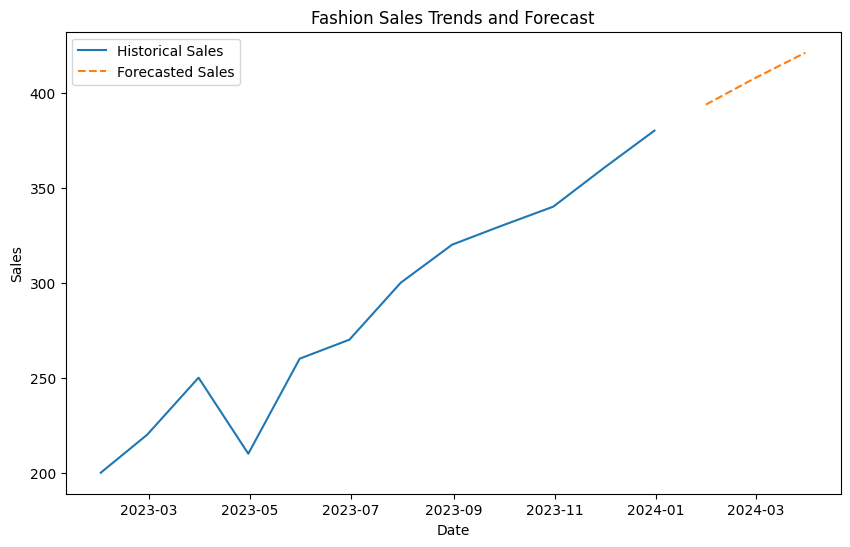

Forecasted Sales for the next 3 months:
Month 1: 393.66
Month 2: 407.32
Month 3: 420.98


In [63]:
# Trend Forecasting
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 250, 210, 260, 270, 300, 320, 330, 340, 360, 380]
}
trend_df = pd.DataFrame(data)
trend_df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(trend_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)  # Get the forecast for the next 3 months

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start='2024-01-01', periods=3, freq='M'), forecast, label='Forecasted Sales', linestyle='--')
plt.title('Fashion Sales Trends and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted Sales for the next 3 months:")
for i, value in enumerate(forecast, 1):
    print(f"Month {i}: {value:.2f}")


In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
# Initialize Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Example function to predict from an image URL
def predict_from_image_url(image_url):
    # Load image from URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('L')
    
    # Resize the image to 28x28
    img = img.resize((28, 28))
    
    # Convert the image to numpy array and preprocess
    img_array = np.array(img).reshape((1, 28, 28, 1)).astype('float32') / 255
    
    # Make predictions
    predictions = loaded_model.predict(img_array)
    class_index = np.argmax(predictions)
    
    # Map index to class name
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[class_index]

# Function for sentiment analysis
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment



In [81]:
# Define a function to extract valid links by removing editing parameters
def extract_valid_links(urls):
    valid_links = []
    for url in urls:
        base_url = url.split('?')[0]  # Remove parameters from the URL
        # Check if the base URL is an image (filter by common image extensions)
        if any(base_url.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg', '.gif']):
            valid_links.append(base_url)
    return valid_links

# Define a function to clean up image URLs
def clean_image_urls(urls):
    cleaned_urls = []
    for url in urls:
        # Remove any URL parameters that might interfere with image processing
        base_url = url.split('?')[0]
        cleaned_urls.append(base_url)
    return cleaned_urls

# Example list of image URLs (could be the result of your web scraping)
test_urls = [
    'https://www.elle.com/_assets/design-tokens/fre/static/icons/search.f1c199c.svg?crop=1.00xw:0.670xh;0,0.160xh&resize=1200:*',
    'https://www.elle.com/_assets/design-tokens/fre/static/icons/close.38e3324.svg?crop=1.00xw:0.670xh;0,0.160xh&resize=1200:*',
    'https://www.elle.com/_assets/design-tokens/elle/static/images/logos/logo.2856426.svg?primary=navLogoColor',
    'https://hips.hearstapps.com/hmg-prod/images/hannah-berner-2-668d5a7aa493f.png?crop=1.00xw:0.670xh;0,0.160xh&resize=1200:*',
    'https://hips.hearstapps.com/hmg-prod/images/elle-substack-index-668c2a662a751.jpg?crop=1.00xw:0.736xh;0,0.262xh&resize=1200:*',
    'https://hips.hearstapps.com/hmg-prod/images/elm050123wlcolorful-005-2-6642320a2b71a.jpg?crop=0.886xw:0.560xh;0.0272xw,0.0628xh&resize=360:*',
    'https://hips.hearstapps.com/hmg-prod/images/celine-elm-0521240726-665f7cb6231e8.jpg?crop=0.742xw:1.00xh;0.130xw,0&resize=360:*',
    'https://hips.hearstapps.com/hmg-prod/images/ba-sh-ara-bag-6657c4f39bc29.jpg?crop=0.682xw:0.920xh;0.137xw,0.023xh&resize=360:*'
]

# Clean image URLs
cleaned_urls = clean_image_urls(test_urls)

# Extract valid image URLs
valid_image_urls = extract_valid_links(cleaned_urls)
i=0
# Test the prediction function with valid URLs
for url in valid_image_urls:
    print(f"Image ",i)
    print(f"Predicted class: {predict_from_image_url(url)}")
    print()
    i+=1


Image  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: Bag

Image  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: Shirt

Image  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: Bag

Image  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: Bag

Image  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Bag



In [94]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt 

# Download the VADER lexicon if not already present
nltk.download('vader_lexicon')

# Load the saved model
current_path = os.getcwd()
model_path = os.path.join(current_path, 'fashion_mnist_model.keras')
loaded_model = tf.keras.models.load_model(model_path)

# Define the prediction function
def predict_from_image_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).reshape((1, 28, 28, 1)).astype('float32') / 255
    predictions = loaded_model.predict(img_array)
    class_index = np.argmax(predictions)
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[class_index]

# Sentiment Analysis Function
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Trend Forecasting Data and Model
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 250, 210, 260, 270, 300, 320, 330, 340, 360, 380]
}
trend_df = pd.DataFrame(data)
trend_df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(trend_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)
# Get the forecast for the next 3 months
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start='2024-01-01', periods=3, freq='M'), forecast, label='Forecasted Sales', linestyle='--')
plt.title('Fashion Sales Trends and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Streamlit app
def main():
    st.title('Fashion MNIST Classification and Trend Forecasting')
    
    # Fashion MNIST Prediction
    st.header("Fashion MNIST Prediction")
    image_url = st.text_input("Enter the image URL:")
    if image_url:
        predicted_class = predict_from_image_url(image_url)
        st.write(f"Predicted class: {predicted_class}")

    # Display Forecast DataFrame
    st.header("Sales Trend Forecasting")
    st.write(trend_df)
    
    forecast_values = forecast.tolist()  # Convert forecast to list
    st.write("Forecasted Sales for the next 3 months:")
    for i, value in enumerate(forecast_values, 1):
        st.write(f"Month {i}: {value:.2f}")

    # Sentiment Analysis
    st.header("Sentiment Analysis")
    user_text = st.text_area("Enter text for sentiment analysis:")
    if user_text:
        sentiment = analyze_sentiment(user_text)
        st.write(f"Sentiment Scores: {sentiment}")

if __name__ == "__main__":
    main()


Overwriting app.py


In [96]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt 
import io  # Import io for creating an in-memory buffer for the plot

# Download the VADER lexicon if not already present
nltk.download('vader_lexicon')

# Load the saved model
current_path = os.getcwd()
model_path = os.path.join(current_path, 'fashion_mnist_model.keras')
loaded_model = tf.keras.models.load_model(model_path)

# Define the prediction function
def predict_from_image_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).reshape((1, 28, 28, 1)).astype('float32') / 255
    predictions = loaded_model.predict(img_array)
    class_index = np.argmax(predictions)
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[class_index]

# Sentiment Analysis Function
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Trend Forecasting Data and Model
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 250, 210, 260, 270, 300, 320, 330, 340, 360, 380]
}
trend_df = pd.DataFrame(data)
trend_df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(trend_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)  # Get the forecast for the next 3 months

# Plot the results
def plot_forecast():
    plt.figure(figsize=(10, 6))
    plt.plot(trend_df.index, trend_df['Sales'], label='Historical Sales', color='blue')
    plt.plot(pd.date_range(start='2024-01-01', periods=3, freq='M'), forecast, label='Forecasted Sales', linestyle='--', color='red')
    plt.title('Fashion Sales Trends and Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    # Save the plot to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()  # Close the plt figure to avoid display issues
    return buf

# Streamlit app
def main():
    st.title('Fashion MNIST Classification and Trend Forecasting')
    
    # Fashion MNIST Prediction
    st.header("Fashion MNIST Prediction")
    image_url = st.text_input("Enter the image URL:")
    if image_url:
        predicted_class = predict_from_image_url(image_url)
        st.write(f"Predicted class: {predicted_class}")

    # Display Forecast DataFrame
    st.header("Sales Trend Forecasting")
    st.write(trend_df)
    
    # Plot and display the forecast graph
    st.subheader("Sales Trend Forecast Plot")
    buf = plot_forecast()
    st.image(buf, caption="Sales Trend and Forecast", use_column_width=True)
    
    forecast_values = forecast.tolist()  # Convert forecast to list
    st.write("Forecasted Sales for the next 3 months:")
    for i, value in enumerate(forecast_values, 1):
        st.write(f"Month {i}: {value:.2f}")

    # Sentiment Analysis
    st.header("Sentiment Analysis")
    user_text = st.text_area("Enter text for sentiment analysis:")
    if user_text:
        sentiment = analyze_sentiment(user_text)
        st.write(f"Sentiment Scores: {sentiment}")

if __name__ == "__main__":
    main()


Overwriting app.py
